## Supervised Learning Project: Finding Donors for CharityML

This project was completed as a part of Udacity's Machine Learning Nanodegree.

The dataset for this project originates from the UCI Machine Learning Repository. 
The datset was donated by Ron Kohavi and Barry Becker, after being published in the article "Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid". 
You can find the article by Ron Kohavi online. The data we investigate here consists of small changes to the original dataset, such as removing the 'fnlwgt' feature and records with missing or ill-formatted entries.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import rcParams

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
#load data
df = pd.read_csv('census.csv')

In [3]:
# set up to view all the info of the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [5]:
df.shape

(45222, 14)

In [6]:
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


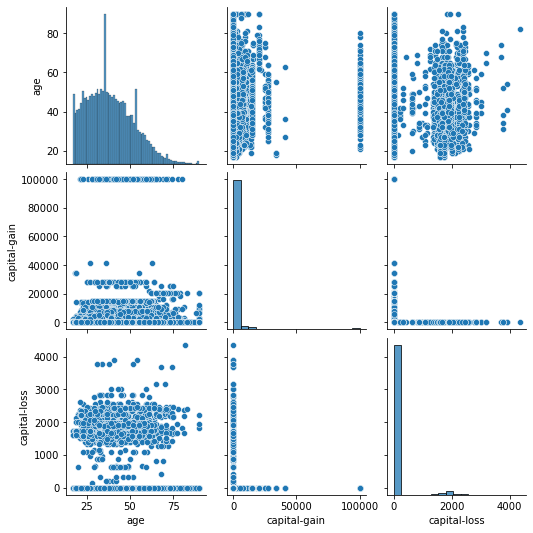

In [7]:
figure = sb.pairplot(df[['age','capital-gain','capital-loss']])
figure.savefig('distribution.png', dpi=400)


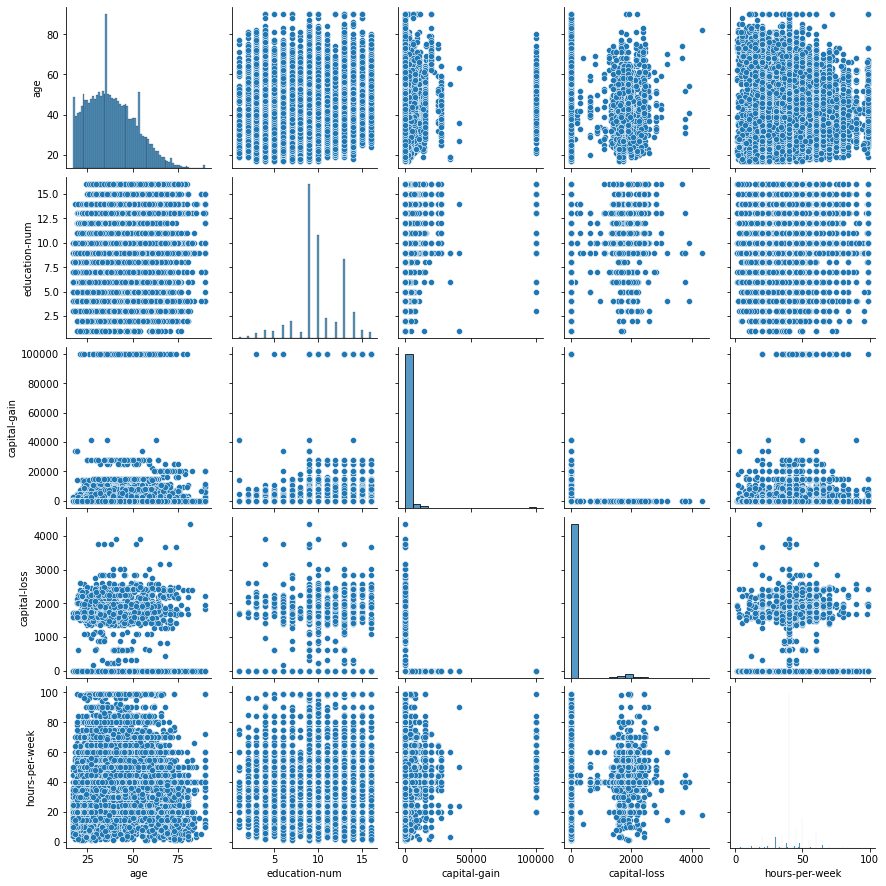

In [8]:
sb.pairplot(df)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [10]:
df[df.duplicated()].shape[0]

5982

In [11]:
df.drop_duplicates(inplace=True)
df[df.duplicated()].shape[0]

0

In [12]:
# Log-transform the skewed features
skewed = ['age',
          'capital-gain', 'capital-loss']

df_log = df[skewed].apply(lambda x: np.log(x + 1))

df.drop(skewed , axis=1, inplace=True)
df = pd.concat([df, df_log], axis=1)

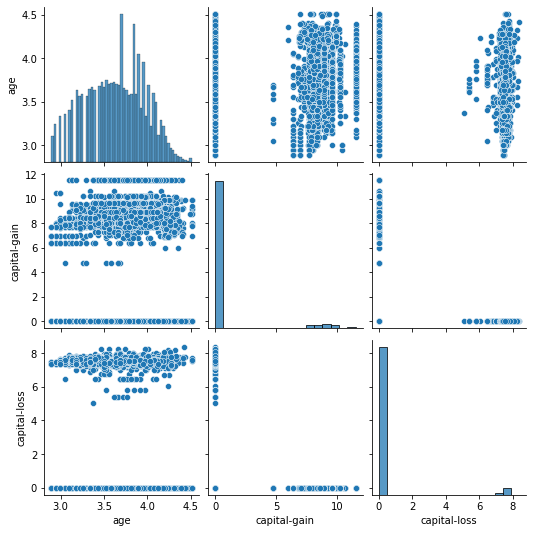

In [13]:
sb.pairplot(df_log)

In [14]:
df['hours-per-week'].std()

12.45802079077719

In [15]:
df['hours-per-week'].describe()

count    39240.000000
mean        41.206091
std         12.458021
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

In [16]:
df = df[df['hours-per-week'] <= df['hours-per-week'].mean() + 3*df['hours-per-week'].std() ]
df = df[df['hours-per-week'] >= df['hours-per-week'].mean() - 3*df['hours-per-week'].std() ]

In [17]:
df.shape[0]

38521

In [18]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

df[numerical] = scaler.fit_transform(df[numerical])
df[numerical].describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,38521.000000,38521.000000,38521.000000,38521.000000,38521.000000
mean,0.462518,0.609152,0.073224,0.048583,0.476754
std,0.207299,0.175475,0.227036,0.203055,0.155365
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.315230,0.533333,0.000000,0.000000,0.464789
50%,0.477134,0.600000,0.000000,0.000000,0.464789
75%,0.617992,0.800000,0.000000,0.000000,0.535211
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
df['income'] = df['income'].map({'>50K': 1, '<=50K': 0})
df.income.sample(10)

33497    0
37383    0
19568    1
21524    1
5213     1
18916    0
14481    0
28373    1
32054    0
20526    0
Name: income, dtype: int64

In [20]:
df = pd.get_dummies(df)
df.head()

,education-num,hours-per-week,income,age,capital-gain,capital-loss,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_level_ 10th,education_level_ 11th,education_level_ 12th,education_level_ 1st-4th,education_level_ 5th-6th,education_level_ 7th-8th,education_level_ 9th,education_level_ Assoc-acdm,education_level_ Assoc-voc,education_level_ Bachelors,education_level_ Doctorate,education_level_ HS-grad,education_level_ Masters,education_level_ Preschool,education_level_ Prof-school,education_level_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native-country_ Cambodia,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.800000,0.464789,0,0.492758,0.667492,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.800000,0.084507,0,0.642679,0.000000,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.533333,0.464789,0,0.477134,0.000000,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0.400000,0.464789,0,0.677952,0.000000,0.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.800000,0.464789,0,0.294309,0.000000,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
target = df.income
df.drop(['income'] , axis=1, inplace=True)

In [22]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, 
                                                    target, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 30816 samples.
Testing set has 7705 samples.


In [23]:
target.sum(), target.shape[0]

(9777, 38521)

In [24]:
# Calculate accuracy, precision and recall
accuracy =  target.sum()/target.shape[0]
recall = target.sum()/target.sum()
precision = target.sum()/target.shape[0]

# Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
fscore = (1+0.5**2)*(precision*recall)/(0.5**2*precision + recall)
AUC = 0.5

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, AUC: {:.4f}, F-score: {:.4f}]".format(accuracy, AUC, fscore))

Naive Predictor: [Accuracy score: 0.2538, AUC: 0.5000, F-score: 0.2983]


In [25]:
# Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import accuracy_score, roc_auc_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    from time import time
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:int(X_train.shape[0]*sample_size)], y_train[:int(X_train.shape[0]*sample_size)])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
    
     # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute AUC on the the first 300 training samples using roc_auc_score()
    results['auc_train'] = roc_auc_score(y_train[:300], predictions_train)
        
    # Compute AUC on the test set which is y_test
    results['auc_test'] = roc_auc_score(y_test, predictions_test)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [27]:
# Import the three supervised learning models from sklearn
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb

# TODO: Initialize the three models
clf_A = RandomForestClassifier(random_state=42)
clf_B = GradientBoostingClassifier(random_state=42)
clf_C = xgb.XGBClassifier(random_state=42)

In [28]:
# Calculate the number of samples for 1%, 10%, and 100% of the training data
# samples_100 is the entire training set i.e. len(y_train)
# samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = 0.1*len(y_train)
samples_1 = 0.01*len(y_train)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

RandomForestClassifier trained on 308.16 samples.
RandomForestClassifier trained on 3081.6000000000004 samples.
RandomForestClassifier trained on 30816 samples.
GradientBoostingClassifier trained on 308.16 samples.
GradientBoostingClassifier trained on 3081.6000000000004 samples.
GradientBoostingClassifier trained on 30816 samples.
XGBClassifier trained on 308.16 samples.
XGBClassifier trained on 3081.6000000000004 samples.
XGBClassifier trained on 30816 samples.


In [29]:
def evaluate(results):
    import matplotlib.patches as mpatches
    # Create figure
    fig, ax = plt.subplots(2, 3, figsize = (11,7))
    # Constants
    bar_width = 0.3
    colors = ['navy','yellow','green']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'auc_train', 'pred_time', 'acc_test', 'auc_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("AUC")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("AUC")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("AUC on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("AUC on Testing Set")
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))
    plt.tight_layout()
    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    plt.legend(handles = patches, bbox_to_anchor = (-.80, 2.53), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    plt.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    plt.show()

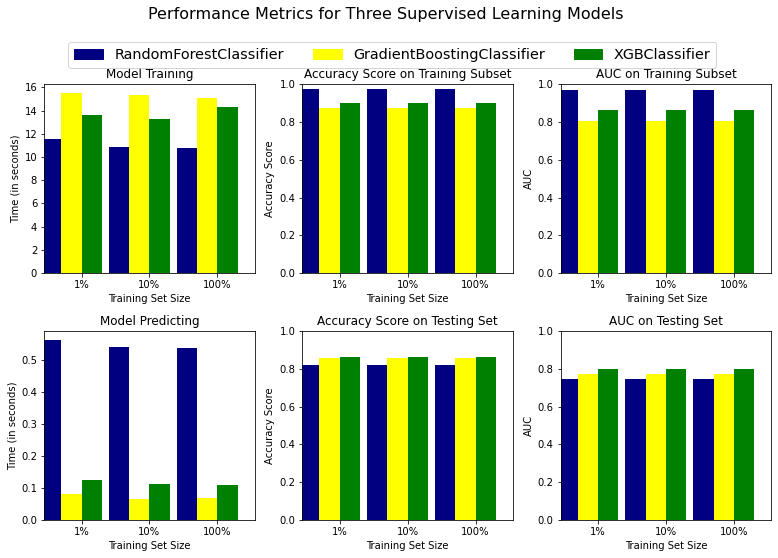

In [30]:
evaluate(results)

In [31]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV

# Initialize the classifier
clf =  xgb.XGBClassifier(random_state=42)

# Create the parameters list
parameters = {
    "learning_rate" : [0.1, 1],
    "n_estimators": [300, 400],
    'max_depth': [3, 5],
    'gamma' : [0.1, 0.3],
    'max_delta_step' : [1,3]
}

# Make an roc_auc_score scoring object using make_scorer()
#scorer = make_scorer(roc_auc_score)

# Perform random search on the classifier using 'scorer' as the scoring method using GridSearchCV()
random_obj = RandomizedSearchCV(clf, parameters)

# Fit the random search object to the training data and find the optimal parameters using fit()
random_fit = random_obj.fit(X_train, y_train)

# Get the estimator
best_clf = random_fit.best_estimator_


In [32]:
random_fit.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=3, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=400,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [33]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score

xg_clf = xgb.XGBClassifier(learning_rate = 0.1, 
                            n_estimators = 400, 
                           max_depth = 5,
                           gamma = 0.1,
                           max_delta_step = 1,
                            seed=42)

xg_clf.fit(X_train,y_train)
preds = xg_clf.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, preds))
print("AUC: ", roc_auc_score(y_test, xg_clf.predict_proba(X_test)[:,1]))

Accuracy: 0.862946138870863
AUC:  0.9252236372277979


In [35]:
df_test = pd.read_csv('test_census.csv')
df_test.drop(['Unnamed: 0'] , axis=1, inplace=True)

In [36]:
categorical_var = []
for i in list(df.columns):
    if i not in ['education-num', 'hours-per-week','age','capital-gain','capital-loss']:
        categorical_var.append(i)

In [37]:
# Log-transform the skewed features
skewed = ['age','capital-gain', 'capital-loss']

df_log = df_test[skewed].apply(lambda x: np.log(x + 1))

df_test.drop(skewed , axis=1, inplace=True)

df_test = pd.concat([df_test, df_log], axis=1)

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

df_test[numerical] = scaler.fit_transform(df_test[numerical])

# fill missing values for numeric variables with approximatelly gaussian dictribution:
for col in ['age', 'education-num', 'hours-per-week']:
    df_test[col]= df_test[col].fillna(df[col].mean())

# fill missing values for numeric variables with skewed dictribution:
for col in ['capital-gain', 'capital-loss']:
    df_test[col]= df_test[col].fillna(df[col].median())

#fill missing categorical values with most freaquent category in training data:
#load data
og_df = pd.read_csv('census.csv')

for col in categorical_var:
    if col in list(df_test.columns):
        df_test[col]= df_test[col].fillna(og_df.groupby([col])[col].count().sort_values(ascending=False).index[0])
        
df_test = pd.get_dummies(df_test)

In [38]:
xg_preds = xg_clf.predict_proba(df_test)[:, 1]

In [39]:
final = pd.DataFrame(list(xg_preds), columns = ['income'])
final = final.reset_index()
final.rename(columns={"index":"id"}, inplace = True)
final.head()

,id,income
0,0,0.009806
1,1,0.708679
2,2,0.189490
3,3,0.999236
4,4,0.031984


In [40]:
final.to_csv('final.csv', index=False)